In [1]:
POOL_NAME = 'RBS'
PROJECT_NAME = 'pozas_110125_100_10_120'
PATH_POOL = f'{POOL_NAME}_z_model2.exr'

In [2]:
import os 
import cv2
import numpy as np

In [3]:
def bresenham_line(start=(10, 10), end=(10, 60)):
    """
    Generate a list of points using Bresenham's Line Algorithm.

    This algorithm computes the points between two coordinates (start, end),
    producing a list of tuples representing the line connecting these two points
    based on the principle of rasterizing a line.

    Parameters:
        start (tuple): The starting point of the line as (x1, y1).
        end (tuple): The ending point of the line as (x2, y2).

    Returns:
        list: A list of points (x, y) between the start and end points.

    Examples:
        >>> points1 = generate_bresenham_line((0, 0), (3, 4))
        >>> points2 = generate_bresenham_line((3, 4), (0, 0))
        >>> assert(set(points1) == set(points2))
        >>> print(points1)
        [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4)]
        >>> print(points2)
        [(3, 4), (2, 3), (1, 2), (1, 1), (0, 0)]
    """

    # Unpack start and end points
    x1, y1 = np.array(start, dtype=np.int32).copy()
    x2, y2 = np.array(end, dtype=np.int32).copy()


    # Calculate differences
    dx = x2 - x1
    dy = y2 - y1

    # Determine if the line is steep (more vertical than horizontal)
    is_steep = abs(dy) > abs(dx)

    # Swap coordinates if the line is steep (for easier handling)
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2

    # Ensure the line is always drawn left-to-right
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1

    # Recalculate differences after the possible swap
    dx = x2 - x1
    dy = y2 - y1

    # Error term initialized to half of dx
    error = dx // 2
    ystep = 1 if y1 < y2 else -1  # Determines whether to increment or decrement y

    # List to store the generated points
    points = []
    y = y1

    # Main loop for Bresenham's algorithm
    for x in range(x1, x2 + 1):
        coord = (y, x) if is_steep else (x, y)  # Swap x and y if the line is steep
        points.append(coord)

        # Update error term
        error -= abs(dy)

        # If error is negative, adjust y and reset the error term
        if error < 0:
            y += ystep
            error += dx

    return points


In [4]:
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"

z = cv2.imread(PATH_POOL, cv2.IMREAD_UNCHANGED)
w, h = z.shape
diagonal_1 = bresenham_line(start=(0,0), end=(w-1,h-1))
diagonal_2 = bresenham_line(start=(0,h-1), end=(w-1,0))

In [5]:
norm = 6.0590000000001965
z_water = 0.3213354647910284
z_water_denorm = z_water * -norm
z_water_denorm

-1.9469715811689043

In [6]:
values_diagonal_1 = np.array([z[y, x] for x, y in diagonal_1])
values_diagonal_2 = np.array([z[y, x] for x, y in diagonal_2])

values_diagonal_1 = z_water - values_diagonal_1
values_diagonal_2 = z_water - values_diagonal_2

In [7]:
# from sklearn.mixture import GaussianMixture
# from utils.plot_tools import plot_gmm

# gmm = GaussianMixture(n_components=1)
# gmm.fit(values_diagonal_1.reshape(-1, 1))
# #plot_gmm(diagonal_1, gmm)

# d1_mean = np.max(gmm.means_)
# print(d1_mean * norm)

# gmm.fit(values_diagonal_2.reshape(-1, 1))
# d2_mean = np.max(gmm.means_)
# print(d2_mean * norm)
# #plot_gmm(diagonal_2, gmm)



In [8]:
z = z_water - z  
np.mean(z) * norm

np.float32(0.6662818)

In [9]:
mean_diagonal1  = np.mean(values_diagonal_1) 
mean_diagonal2 = np.mean(values_diagonal_2)
print(mean_diagonal1 * norm, mean_diagonal2 * norm)

0.6847503 0.660729


0.6847503 0.660729


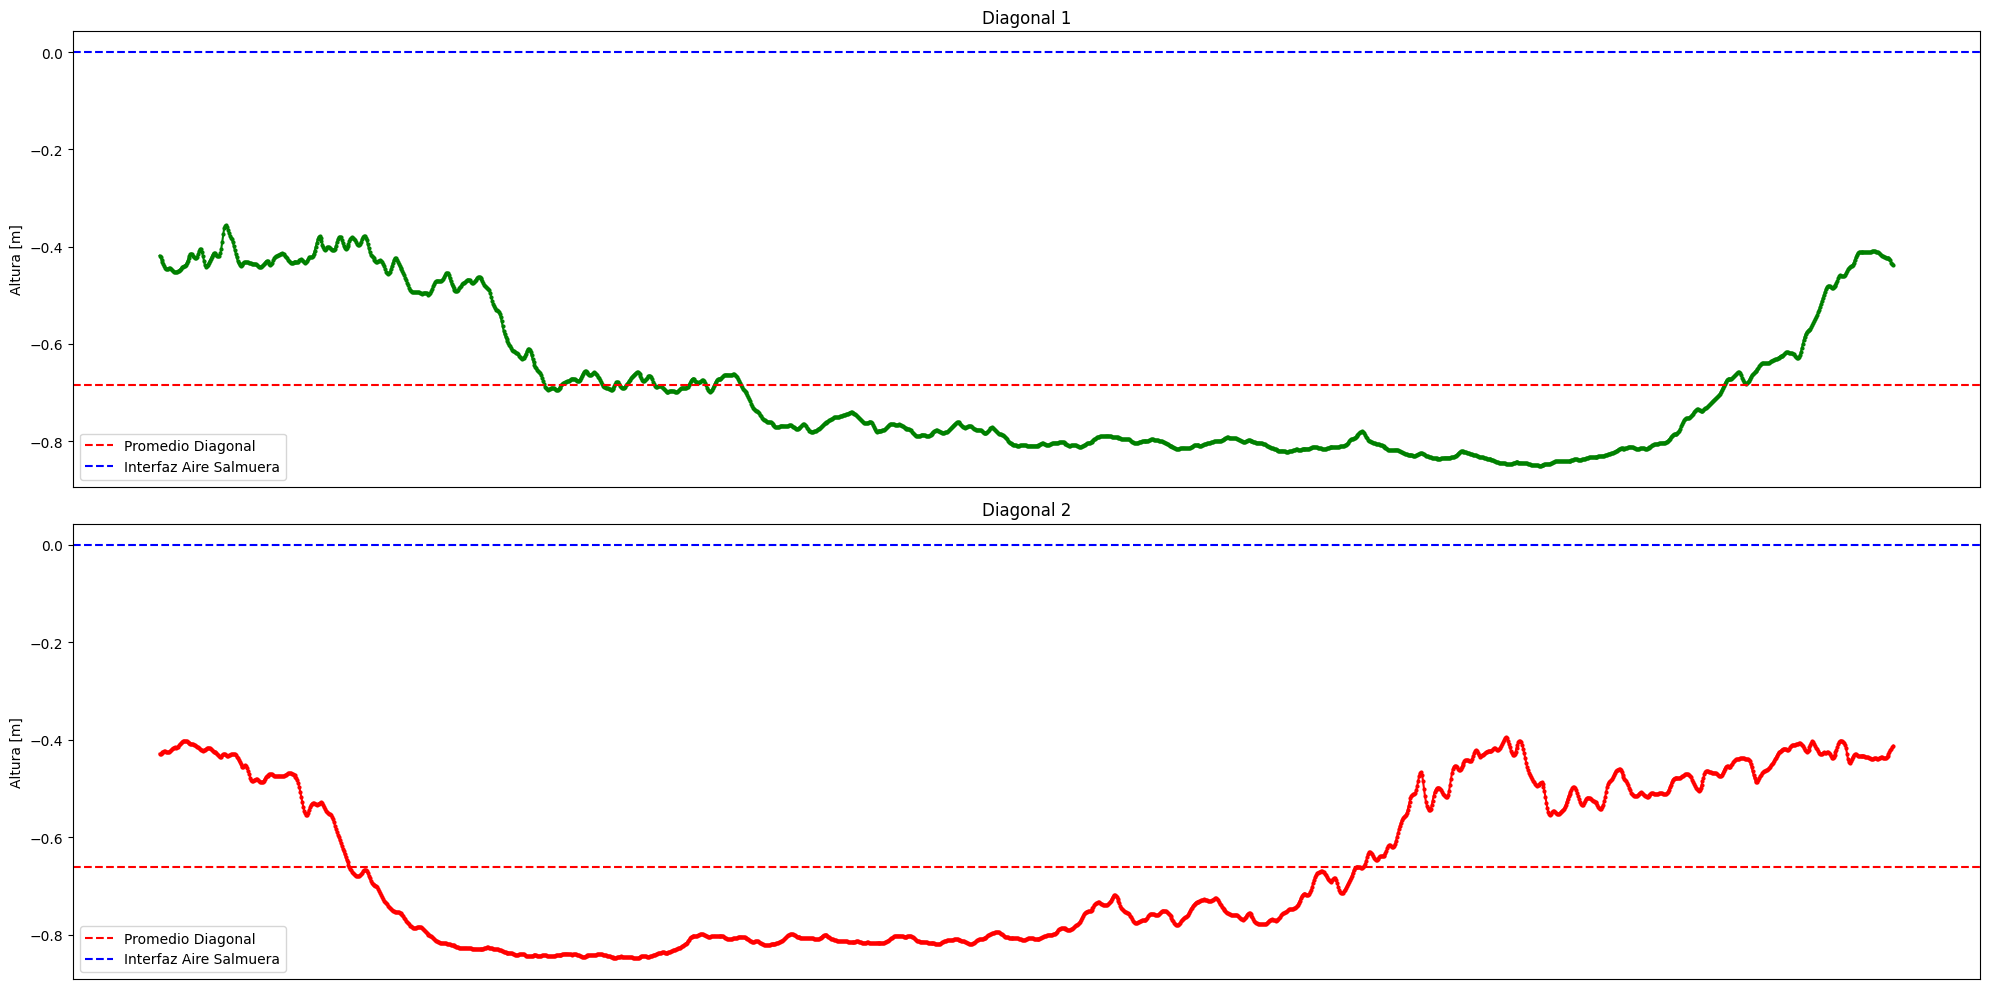

In [10]:
import matplotlib.pyplot as plt 

mean_diagonal1  = np.mean(values_diagonal_1) 
mean_diagonal2 = np.mean(values_diagonal_2)
print(mean_diagonal1 * norm, mean_diagonal2 * norm)

plt.figure(figsize=(20, 10))  # Ajustar el tamaño de la figura

# Gráfica de la diagonal 1
plt.subplot(2, 1, 1)
plt.plot(values_diagonal_1 * -norm, marker='o', markersize=2, linestyle='-', color='g')
plt.axhline(y=mean_diagonal1 * -norm, color='r', linestyle='--', label='Promedio Diagonal')
plt.axhline(y=0, color='b', linestyle='--', label='Interfaz Aire Salmuera')  # Línea en cero
plt.title('Diagonal 1')
plt.ylabel('Altura [m]')
plt.legend()
plt.gca().set_xticks([]) 

# Gráfica de la diagonal 2
plt.subplot(2, 1, 2)
plt.plot(values_diagonal_2 * -norm, marker='o', markersize=2, linestyle='-', color='r')
plt.axhline(y=mean_diagonal2 * -norm, color='r', linestyle='--', label='Promedio Diagonal')
plt.axhline(y=0, color='b', linestyle='--', label='Interfaz Aire Salmuera')  # Línea en cero
plt.title('Diagonal 2')
plt.ylabel('Altura [m]')
plt.legend()
plt.gca().set_xticks([]) 

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar la gráfica
plt.show()